In [8]:
import numpy as np
from sklearn.cross_validation import train_test_split

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

我们使用numpy自己构建一个数据集

In [10]:
np.random.seed(250)
X = np.random.rand(100, 1)
y = 10 * X + 10 + np.random.randn(100, 1)

首先看一下我们生成的数据集的样子

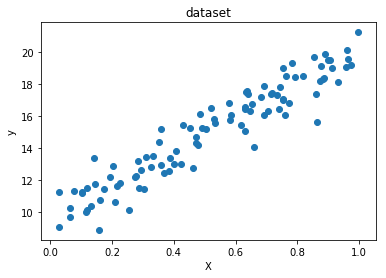

In [12]:
plt.scatter(X,y)
plt.title("dataset")
plt.xlabel("X")
plt.ylabel("y")

接下来我们将数据划分为训练集和验证集。

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

接下来我们要定义线性回归的模型。这里我写一个类来实现这个模型

In [31]:
class LinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y, lr=0.01, n_iters=100):
        """
        use gradient descent to train the linear model
        """
        n_samples, n_features = X.shape
        self.weight = np.ones(shape=(n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            y_pre = np.dot(X, self.weight) + self.bias
            cost = (1/n_samples) * np.sum((y_pre - y)**2)
            costs.append(cost)
            
            if i % 100 ==0:
                print("Cost at iteration {i}:{cost}")
                
            #compute the gradients
            dj_w = (2/n_samples)*np.dot(X.T, (y_pre - y))
            dj_b = (2/n_samples)*np.sum((y_pre-y))
            
            #update the parameters
            self.weight = self.weight - lr * dj_w
            self.bias = self.bias - lr * dj_b
    
        return self.weight, self.bias, costs
    
    def predict(self, X):
        return np.dot(X, self.weight) + self.bias

开始训练并将误差画在图上

Cost at iteration {i}:{cost}
Cost at iteration {i}:{cost}
Cost at iteration {i}:{cost}
Cost at iteration {i}:{cost}
Cost at iteration {i}:{cost}
Cost at iteration {i}:{cost}
Cost at iteration {i}:{cost}


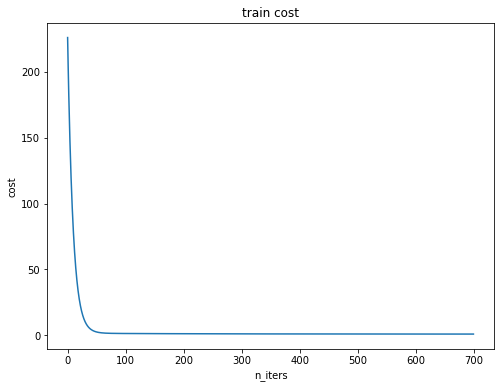

In [32]:
lr = LinearRegression()
learning_rate = 0.02
n_iters = 700
train_w, train_b, train_c = lr.fit(X_train, y_train, lr=learning_rate, n_iters=n_iters)
fig = plt.figure(figsize=(8, 6))
plt.plot(range(n_iters), train_c)
plt.title("train cost")
plt.xlabel("n_iters")
plt.ylabel("cost")

接下来对测试集进行预测，我们先定义一个评估函数，来评估预测结果是否准确，这里使用MSE（均方误差函数）

In [33]:
def MSE(ypre, y):
    return (1/len(y_pre)) * np.sum((y_pre - y)**2)

In [35]:
y_pre = lr.predict(X_test)
test_c = MSE(y_pre, y_test)
print(test_c)

1.36509117091


最后我们在图上画出拟合的线性模型

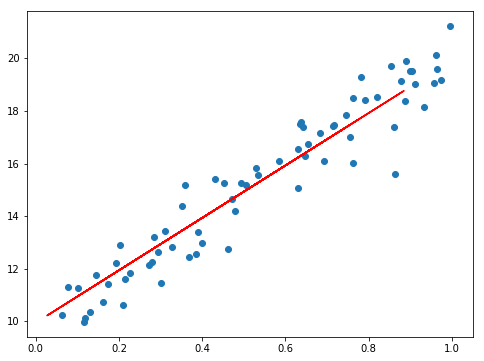

In [38]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.plot(X_test, y_pre, c='r')